<a href="https://colab.research.google.com/github/aislam388/Radiomics/blob/main/Raidomics_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydicom

In [ ]:
!pip uninstall radiomics

In [ ]:
!pip install pyradiomics

In [ ]:
import radiomics
import six
import os
# import pyradiomics
# from radiomics import featureextractor
from radiomics import featureextractor  # This module is used for interaction with pyradiomics

In [ ]:
# imagePath, maskPath = radiomics.getTestCase('lung1')

In [ ]:
imagePath='/content/drive/My Drive/LIDC_NRRD/LIDC05/3000548 Unnamed Series_1.nrrd'
maskPath='/content/drive/My Drive/LIDC_NRRD/LIDC05/Segmentation of Nodule 3 - Annotation Nodule 004-1_6-label.nrrd'

In [ ]:
import os
import collections
import SimpleITK as sitk
import numpy
import six
import radiomics
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm

In [ ]:
if imagePath is None or maskPath is None:  # Something went wrong, in this case PyRadiomics will also log an error
    raise Exception('Error getting testcase!')  # Raise exception to prevent cells below from running in case of "run all"

# Additonally, store the location of the example parameter file, stored in \pyradiomics\examples/exampleSettings
paramPath = os.path.join('..', 'examples', 'exampleSettings', 'Params.yaml')
print('Parameter file, absolute path:', os.path.abspath(paramPath))

Parameter file, absolute path: /examples/exampleSettings/Params.yaml


In [ ]:
extractor = featureextractor.RadiomicsFeatureExtractor()

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [ ]:
image1, mask1 = extractor.loadImage(imagePath,maskPath)

In [ ]:
import os
import SimpleITK as sitk 
image_1 = sitk.ReadImage(imagePath)
label_1 = sitk.ReadImage(maskPath)

In [ ]:
settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
# settings['resampledPixelSpacing'] = [3, 3, 3]  # This is an example for defining resampling (voxels with size 3x3x3mm)
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True

In [ ]:
# Resample if necessary
interpolator = settings.get('interpolator')
resampledPixelSpacing = settings.get('resampledPixelSpacing')
if interpolator is not None and resampledPixelSpacing is not None:
  image, mask = imageoperations.resampleImage(image1, mask1, **settings)

In [ ]:
print(imageoperations.getMask(mask1))

Image (0x3b3739c0)
  RTTI typeinfo:   itk::Image<unsigned int, 3u>
  Reference Count: 1
  Modified Time: 14023
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 14012
  UpdateMTime: 14022
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  Spacing: [0.664062, 0.664062, 2.5]
  Origin: [-163.3, -170, -340.045]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.664062 0 0
0 0.664062 0
0 0 2.5

  PointToIndexMatrix: 
1.50588 0 0
0 1.50588 0
0 0 0.4

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x21762bc0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned in

In [ ]:
masked = imageoperations._correctMask(image1,mask1)


In [ ]:
# Crop the image
# bb is the bounding box, upon which the image and mask are cropped
bb, correctedMask = imageoperations.checkMask(image1, masked,label=1)
if correctedMask is not None:
    mask = correctedMask
croppedImage, croppedMask = imageoperations.cropToTumorMask(image1, masked, bb)

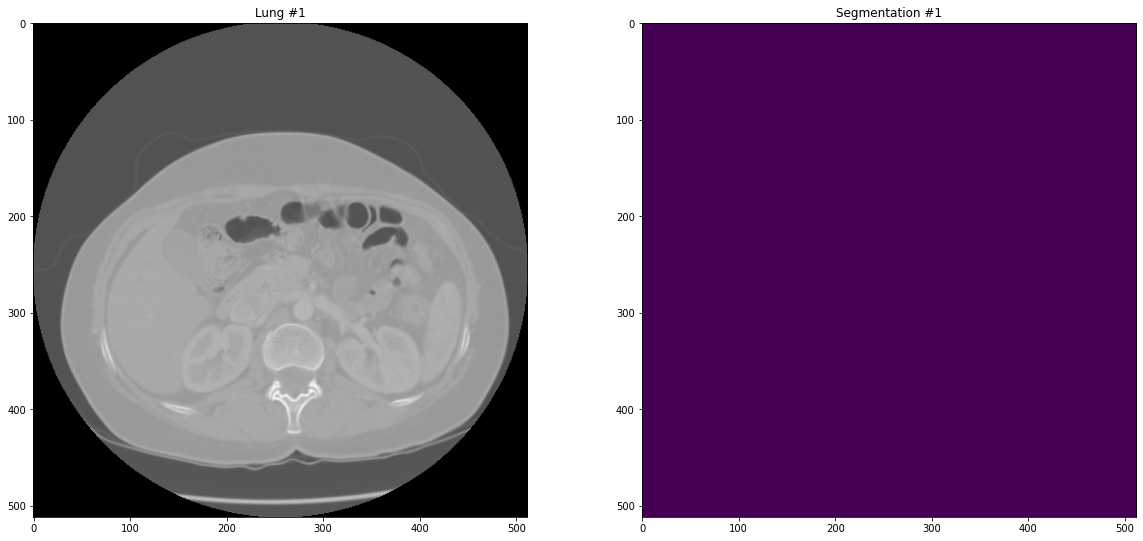

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image1)[12,:,:], cmap="gray")
plt.title("Lung #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(masked)[12,:,:])        
plt.title("Segmentation #1")

# # Second image
# plt.subplot(2,2,3)
# plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")        
# plt.title("Brain #2")

# plt.subplot(2,2,4)
# plt.imshow(sitk.GetArrayFromImage(label_2)[8,:,:])        
# plt.title("Segmentation #2")

plt.show()

In [ ]:
result = extractor.execute(image1, masked,label=None, label_channel=None,voxelBased=False )

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [ ]:
import radiomics.firstorder

In [ ]:
# file =open("/content/drive/My Drive/test_file.csv","w+")

In [ ]:
print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
patient=5
count=3
file= open("/content/drive/My Drive/radiomics_results_Patient%d_File%d.csv"%(patient,count),"w+")
for key, value in six.iteritems(result):
    print('\t', key, ':', value)
    file.write("\t %s , (%s) \n" %(str(key),str(value)))

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0
	 diagnostics_Versions_Numpy : 1.18.5
	 diagnostics_Versions_SimpleITK : 1.2.4
	 diagnostics_Versions_PyWavelet : 1.0.0
	 diagnostics_Versions_Python : 3.6.9
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : ea99c9c6b09df8d7d2f0102435f12073fda5af91
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (0.664062, 0.664062, 2.5000000984848483)
	 diagnostics_Image-original_Size : (512, 512, 133)
	 diagnostics_Image-original_Mean : 

In [ ]:
# import csv

# with open('/content/drive/My Drive/radiomics_results_Patient13_File3.txt', 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split(",") for line in stripped if line)
#     with open('/content/drive/My Drive/radiomics_results_Patient13_File3_log.csv', 'w') as out_file:
#         writer = csv.writer(out_file)
#         writer.writerow(('features', 'values'))
#         writer.writerows(lines)

see later below

In [ ]:
# first = firstorder.RadiomicsFirstOrder(image1, masked)

# firstOrderFeatures.enableFeatureByName('Mean', True)
# # firstOrderFeatures.enableAllFeatures()

# print('Will calculate the following first order features: ')
# for f in firstOrderFeatures.enabledFeatures.keys():
#   print('  ', f)
#   print(getattr(firstOrderFeatures, 'get%sFeatureValue' % f).__doc__)

# print('Calculating first order features...')
# results = firstOrderFeatures.execute()
# print('done')

# print('Calculated first order features: ')
# for (key, val) in six.iteritems(results):
#   print('  ', key, ':', val)

In [ ]:
# print(first)